In [ ]:
import numpy as np
import pandas as pd
from collections import Counter

from sklearn import preprocessing
from sklearn import datasets
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, RFE
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.preprocessing import LabelEncoder

import warnings

!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 1.1 MB/s eta 0:00:00


## Data Selection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
gdata = pd.read_csv('/content/drive/MyDrive/ML/datasets/g_data.csv', header=None)

In [ ]:
gdata.head()

,0,1,2,3
0,1,Fold1,>P23453,MSGEVLSQNEIDALLSAISTGEMDAEELKKEEKEKKVKVYDFKRAL...
1,1,Fold1,>P07373,MTTKKTSPDLLLVIITLLLLTIGLIMVYSASAVWADYKFDDSFFFA...
2,1,Fold1,>P12921,MIIWINGAFGSGKTQTAFELHRRLNPSYVYDPQKMGFALRSMVPQE...
3,1,Fold1,>P19579,MRRKLTFQEKLLIFIKKTKKKNPRYVAIVLPLIAVILIAATWVQRT...
4,1,Fold1,>A2RMA8,MQNLNKTEKTFFGQPRGLLTLFQTEFWERFSYYGMRAILVYYLYAL...


In [ ]:
gdata.columns = ['fold', 'foldinwords', 'name', 'seq']

In [ ]:
gdata['foldinwords'].value_counts()

Fold3    208
Fold1    174
Fold4    123
Fold2     18
Name: foldinwords, dtype: int64

In [ ]:
gdata.head()

,fold,foldinwords,name,seq
0,1,Fold1,>P23453,MSGEVLSQNEIDALLSAISTGEMDAEELKKEEKEKKVKVYDFKRAL...
1,1,Fold1,>P07373,MTTKKTSPDLLLVIITLLLLTIGLIMVYSASAVWADYKFDDSFFFA...
2,1,Fold1,>P12921,MIIWINGAFGSGKTQTAFELHRRLNPSYVYDPQKMGFALRSMVPQE...
3,1,Fold1,>P19579,MRRKLTFQEKLLIFIKKTKKKNPRYVAIVLPLIAVILIAATWVQRT...
4,1,Fold1,>A2RMA8,MQNLNKTEKTFFGQPRGLLTLFQTEFWERFSYYGMRAILVYYLYAL...


## Preprocessing

In [ ]:
Avalues = pd.read_excel('/content/drive/MyDrive/ML/datasets/List of attributes and their values.xlsx',sheet_name='Sheet2', header=None)

In [ ]:
Avalues.columns = ['Number', 'Attributes', 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

In [ ]:
Avalues = Avalues.iloc[2:, :]

In [ ]:
Avalues.head(10)

,Number,Attributes,A,C,D,E,F,G,H,I,...,M,N,P,Q,R,S,T,V,W,Y
2,1,structure derived hydrophobicity value,0.485714,1,0.057143,0.085714,0.714286,0.428571,0.571429,0.857143,...,0.571429,0.314286,0.171429,0.142857,0.257143,0.228571,0.314286,0.628571,0.885714,0.6
3,2,Polarizability,0.112469,0.312958,0.256724,0.369193,0.709046,0,0.562347,0.454768,...,0.540342,0.327628,0.320293,0.440098,0.711491,0.151589,0.264059,0.342298,1,0.728606
4,3,Normalized frequency of alpha-helix,0.904255,0.138298,0.468085,1,0.595745,0,0.457447,0.542553,...,0.93617,0.106383,0,0.574468,0.43617,0.212766,0.276596,0.521277,0.542553,0.12766
5,4,Normalized frequency of beta-strand,0.345865,0.616541,0.12782,0,0.759398,0.285714,0.37594,0.924812,...,0.511278,0.390977,0.135338,0.548872,0.421053,0.285714,0.616541,1,0.75188,0.827068
6,5,Normalized frequency of turn,0.174312,0.66055,0.908257,0.247706,0.119266,1,0.440367,0,...,0.119266,1,0.963303,0.46789,0.440367,0.880734,0.449541,0.027523,0.449541,0.614679
7,6,Hydrophobicity at ph 7.5 by HPLC,0.628141,0.731156,0,0.050251,0.964824,0.540201,0.376884,1,...,0.816583,0.291457,0.751256,0.306533,0.163317,0.38191,0.472362,0.871859,0.879397,0.638191
8,7,Size,0.285714,0.357143,0.285714,0.642857,0.857143,0,0.785714,0.714286,...,0.785714,0.642857,0.714286,0.785714,1,0.357143,0.642857,0.642857,0.928571,0.928571
9,8,Consensus normalized hydrophobicity scale,0.805627,0.721228,0.41688,0.457801,0.951407,0.769821,0.544757,1,...,0.810742,0.44757,0.677749,0.429668,0,0.601023,0.634271,0.923274,0.85422,0.713555
10,9,Hydrophobicity index base on helix in membrane,0.153846,0.25641,0.282051,0.410256,0.692308,0,0.512821,0.538462,...,0.615385,0.307692,0.205128,0.487179,0.871795,0.153846,0.307692,0.410256,1,0.692308
11,10,Molecular weight,0.108539,0.356739,0.449253,0.557869,0.697685,0,0.620036,0.434311,...,0.573972,0.441666,0.310134,0.550283,0.767438,0.232407,0.341023,0.325772,1,0.821553


In [ ]:
columns_to_convert = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

for col in columns_to_convert:
    Avalues[col] = Avalues[col].astype(float)

In [ ]:
print(Avalues.shape)

(55, 22)


In [ ]:
Avalues.set_index('Attributes', inplace=True)
# Transpose the DataFrame
Avalues = Avalues.T

In [ ]:
# Calculating Weighted Scores for each attributes
def calculate_weighted_attribute_score(attribute_name):
    weighted_scores = []
    for i, row in gdata.iterrows():
        sequence = row['seq']
        frequency = Counter(sequence)
        total_length = len(sequence)
        weighted_score = 0

        for amino_acid, count in frequency.items():
            if amino_acid in ['X', 'U', 'Z']:
                continue
            # Access the score for the amino acid from Avalues
            if amino_acid in Avalues.index:
                amino_acid_score = Avalues.loc[amino_acid, attribute_name]
                weight = count / total_length
                weighted_score += weight * amino_acid_score

        weighted_scores.append(weighted_score)
    return weighted_scores

# Assigning weighted scores to gdata
for attribute_name in Avalues.columns:
    gdata[f'Weighted_{attribute_name}'] = calculate_weighted_attribute_score(attribute_name)


In [ ]:
gdata.head(10)

,fold,foldinwords,name,seq,Weighted_structure derived hydrophobicity value,Weighted_Polarizability,Weighted_Normalized frequency of alpha-helix,Weighted_Normalized frequency of beta-strand,Weighted_Normalized frequency of turn,Weighted_Hydrophobicity at ph 7.5 by HPLC,...,Weighted_Surrounding hydrophobicity in beta-sheet,Weighted_Surrounding hydrophobicity in turn,Weighted_Surrounding hydrophobicity in folded form,Weighted_Average number of surrounding residues,Weighted_Membrane buried helix parameter,Weighted_Mean fractional area loss (f),Weighted_Flexibility,Weighted_Hydration potential (transfer vapour phrase to water at ph 7),Weighted_Bulkiness,Weighted_Polarity (driven from amino acids in proteins)
0,1,Fold1,>P23453,MSGEVLSQNEIDALLSAISTGEMDAEELKKEEKEKKVKVYDFKRAL...,0.392857,0.381116,0.507658,0.479867,0.425141,0.534654,...,0.528961,0.374569,0.396695,0.412711,0.525867,0.525873,0.499802,0.695331,0.665842,0.284996
1,1,Fold1,>P07373,MTTKKTSPDLLLVIITLLLLTIGLIMVYSASAVWADYKFDDSFFFA...,0.492818,0.384939,0.470352,0.567916,0.395423,0.678413,...,0.595745,0.424252,0.499322,0.528909,0.681343,0.632409,0.379519,0.801842,0.683153,0.121356
2,1,Fold1,>P12921,MIIWINGAFGSGKTQTAFELHRRLNPSYVYDPQKMGFALRSMVPQE...,0.411168,0.405731,0.493628,0.485096,0.435244,0.545252,...,0.521590,0.350454,0.387677,0.417709,0.529702,0.532865,0.466979,0.675853,0.657954,0.285812
3,1,Fold1,>P19579,MRRKLTFQEKLLIFIKKTKKKNPRYVAIVLPLIAVILIAATWVQRT...,0.370733,0.385737,0.497541,0.478605,0.448247,0.506003,...,0.522022,0.324234,0.364388,0.382559,0.490596,0.489363,0.517191,0.683755,0.654612,0.316264
4,1,Fold1,>A2RMA8,MQNLNKTEKTFFGQPRGLLTLFQTEFWERFSYYGMRAILVYYLYAL...,0.477091,0.385231,0.476990,0.551459,0.401879,0.654303,...,0.569309,0.395866,0.467903,0.497907,0.652686,0.607543,0.399498,0.781570,0.681605,0.138946
5,1,Fold1,>A6QIG2,MKFKSLITTTLALGVLASTGANFNNNEASAAAKPLDKSSSSLHHGY...,0.362182,0.379798,0.441435,0.495919,0.496387,0.498481,...,0.480039,0.289272,0.339791,0.369208,0.482345,0.463734,0.536158,0.680871,0.652976,0.282667
6,1,Fold1,>P35594,MLCQNCKINDSTIHLYTNLNGKQKQIDLCQNCYKIIKTDPNNSLFK...,0.370821,0.369258,0.483406,0.457437,0.470781,0.505189,...,0.502954,0.328840,0.356831,0.383470,0.492381,0.492737,0.528416,0.684516,0.630758,0.306203
7,1,Fold1,>P0A3G5,MFDKKLLESSELYDKRYRNFSTLIILPLFILLVGGVIFTFFAHKEL...,0.355033,0.362415,0.480407,0.474684,0.473116,0.511821,...,0.469539,0.319031,0.330591,0.369552,0.505217,0.473872,0.538774,0.696050,0.639638,0.224214
8,1,Fold1,>P39755,MLVSLSLSSLLTLFFIMLMASGISGLLFLHPRVPLSFVRIHIGILA...,0.495898,0.385916,0.490036,0.561230,0.383305,0.672332,...,0.609644,0.416201,0.494400,0.530261,0.683944,0.634730,0.368337,0.793160,0.682058,0.132971
9,1,Fold1,>P33379,MGLNRFMRAMMVVFITANCITINPDIIFAATDSEDSSLNTDEWEEE...,0.323139,0.354749,0.495139,0.393907,0.493690,0.479278,...,0.474045,0.291157,0.285590,0.323875,0.466322,0.444645,0.586886,0.666499,0.625565,0.312243


In [ ]:
gdata.columns

Index(['fold', 'foldinwords', 'name', 'seq',
       'Weighted_structure derived hydrophobicity value',
       'Weighted_Polarizability',
       'Weighted_Normalized frequency of alpha-helix',
       'Weighted_Normalized frequency of beta-strand',
       'Weighted_Normalized frequency of turn',
       'Weighted_Hydrophobicity at ph 7.5 by HPLC', 'Weighted_Size',
       'Weighted_Consensus normalized hydrophobicity scale',
       'Weighted_Hydrophobicity index base on helix in membrane',
       'Weighted_Molecular weight', 'Weighted_Hydrophobic parameter',
       'Weighted_Van der waals volume',
       'Weighted_Polarity (driven from amino acids)', 'Weighted_Volume',
       'Weighted_Compressibility',
       'Weighted_Average long range contact energy',
       'Weighted_Average medium range contact energy',
       'Weighted_Long range non bounded energy',
       'Weighted_Mean RMS fluctuational displacement',
       'Weighted_Refractive index', 'Weighted_Solvent accessible reduction',
  

## Feature Selection

In [ ]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, RFE
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


In [ ]:
X = gdata.drop(['fold', 'foldinwords', 'name', 'seq'], axis = 1)
y = gdata['foldinwords']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

feature_names = X.columns

In [ ]:
# scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=feature_names)
X_test = sc.transform(X_test)
X_test = pd.DataFrame(X_test, columns=feature_names)

In [ ]:
# PCA
pca = PCA(n_components=10)
features_pca = pca.fit_transform(X_train)

# Univariate Feature Selection
selector = SelectKBest(f_classif, k=10)
selector.fit(X_train, y_train)
features_kbest = selector.transform(X_train)

In [ ]:
# Feature Importance using ExtraTreesClassifier
tree_clf = ExtraTreesClassifier()
tree_clf.fit(X_train, y_train)
features_importance = tree_clf.feature_importances_

# Recursive Feature Elimination (RFE)
estimator = SVC(kernel="linear")
selector_rfe = RFE(estimator, n_features_to_select=10, step=1)
selector_rfe.fit(X_train, y_train)
selected_features_rfe = X_train.columns[selector_rfe.support_]

In [ ]:
# Feature Selection Using Correlation Matrix
correlation_matrix = X_train.corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.95)]

# Feature Selection Using Mutual Information
mutual_info = mutual_info_classif(X_train, y_train)
mi_series = pd.Series(mutual_info, index=X_train.columns).sort_values(ascending=False)

# Feature Importance using Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
feature_importance_gb = pd.Series(gb_clf.feature_importances_, index=X_train.columns)

In [ ]:
# Feature Selection Results
extracted_features = {
    'PCA': features_pca,
    'KBest': features_kbest,
    'Extra Trees Classifier': features_importance,
    'Recursive Feature Elimination (RFE)': selected_features_rfe,
    'High Correlation Drop': to_drop,
    'Mutual Information': mi_series,
    'Gradient Boosting': feature_importance_gb.sort_values(ascending=False)
}

for method, features in extracted_features.items():
    print(f"\nMethod: {method}")
    if method == 'PCA':
        print(f"Number of Features (PCA): {features.shape[1]}")
        pca_feature_labels = [f'PCA_Component_{i}' for i in range(1, pca.n_components_ + 1)]
        print("PCA Feature Labels:", pca_feature_labels)
        # Top contributing features for each PCA component
        for i, component in enumerate(pca.components_):
            top_features = np.argsort(-np.abs(component))[:5]  # Top 5 features for this component
            top_feature_names = X_train.columns[top_features]
            print(f"Top contributing features for {pca_feature_labels[i]}: {top_feature_names.tolist()}")
        print(f"Sample PCA Features: \n{features[:5]}")

    elif method == 'KBest':
        print(f"Number of Features (KBest): {features.shape[1]}")
        print("KBest Feature Names:", selector.get_feature_names_out())
        print(f"Sample KBest Features: \n{features[:5]}")

    elif method in ['Extra Trees Classifier', 'Gradient Boosting']:
        feature_imp = [(feature, round(importance, 4)) for feature, importance in zip(X_train.columns, features)]
        feature_imp = sorted(feature_imp, key=lambda x: x[1], reverse=True)
        print(f"Feature Importances: \n{feature_imp[:10]}")

    elif method == 'RFE':
        print('Selected features using RFE:', features)

    elif method == 'High Correlation Drop':
        print('Dropped features due to high correlation:', features)

    elif method == 'Mutual Information':
        print('Features ranked by mutual information scores:', features.head(10))



Method: PCA
Number of Features (PCA): 10
PCA Feature Labels: ['PCA_Component_1', 'PCA_Component_2', 'PCA_Component_3', 'PCA_Component_4', 'PCA_Component_5', 'PCA_Component_6', 'PCA_Component_7', 'PCA_Component_8', 'PCA_Component_9', 'PCA_Component_10']
Top contributing features for PCA_Component_1: ['Weighted_Average gain in surrounding hydrophobicity', 'Weighted_Mean fractional area loss (f)', 'Weighted_Hydrophobicity scale (contact energy derived from 3D data)', 'Weighted_Hydrophobic parameter', 'Weighted_Polarity (driven from amino acids)']
Top contributing features for PCA_Component_2: ['Weighted_Ave number of nearest neighbour in chian', 'Weighted_Hydrophobicity index base on helix in membrane', 'Weighted_Absolute entropy', 'Weighted_Van der waals volume', 'Weighted_Size']
Top contributing features for PCA_Component_3: ['Weighted_Normalized frequency of alpha-helix', 'Weighted_Average medium range contact energy', 'Weighted_Normalized frequency of turn', 'Weighted_Hydrophilicity 

## Implementation

### KNN

In [ ]:
sorted_indices = np.argsort(X_train.columns)[::-1]
top_n_indices = sorted_indices[:10]

X_train_important = X_train.iloc[:, top_n_indices]
X_test_important = X_test.iloc[:, top_n_indices]

knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train_important, y_train)

# Predictions using important features
y_pred_knn = knn_model.predict(X_test_important)
cv_scores = cross_val_score(knn_model, X_train_important, y_train, cv=5)  # 5-fold cross-validation

print("KNN Cross-validation scores:", cv_scores)
print("Average KNN CV score:", cv_scores.mean())
print("K-Nearest Neighbors Classifier Report")
print(classification_report(y_test, y_pred_knn))
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
cfr_knn = classification_report(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)


KNN Cross-validation scores: [0.63513514 0.54794521 0.53424658 0.5890411  0.61643836]
Average KNN CV score: 0.5845612736023694
K-Nearest Neighbors Classifier Report
              precision    recall  f1-score   support

       Fold1       0.75      0.80      0.77        49
       Fold2       0.00      0.00      0.00         4
       Fold3       0.74      0.82      0.78        68
       Fold4       0.60      0.42      0.49        36

    accuracy                           0.70       157
   macro avg       0.52      0.51      0.51       157
weighted avg       0.69      0.70      0.69       157

Accuracy: 0.7006369426751592


### SVM

In [ ]:
svm_model = SVC(kernel= 'rbf', random_state=0)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("Support Vector Machine Classifier Report")
print(classification_report(y_test, y_pred_svm))
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
accuracy_svm = accuracy_score(y_test, y_pred_svm)
cfr_svm = classification_report(y_test, y_pred_svm)

warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)

Support Vector Machine Classifier Report
              precision    recall  f1-score   support

       Fold1       0.89      0.69      0.78        49
       Fold2       0.00      0.00      0.00         4
       Fold3       0.76      0.96      0.84        68
       Fold4       0.79      0.72      0.75        36

    accuracy                           0.80       157
   macro avg       0.61      0.59      0.59       157
weighted avg       0.79      0.80      0.78       157

Accuracy: 0.7961783439490446


### Naive Bayes CLassifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("Naïve Bayes Classifier Report")
print(classification_report(y_test, y_pred_nb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb)}")
accuracy_nbc = accuracy_score(y_test, y_pred_nb)
cfr_nbc = classification_report(y_test, y_pred_nb)


Naïve Bayes Classifier Report
              precision    recall  f1-score   support

       Fold1       0.97      0.71      0.82        49
       Fold2       0.04      0.25      0.06         4
       Fold3       0.79      0.87      0.83        68
       Fold4       0.58      0.31      0.40        36

    accuracy                           0.68       157
   macro avg       0.59      0.53      0.53       157
weighted avg       0.78      0.68      0.71       157

Accuracy: 0.6751592356687898


### Artificial Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

ann_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
ann_model.fit(X_train, y_train)
y_pred_ann = ann_model.predict(X_test)

print("Artificial Neural Network Classifier Report")
print(classification_report(y_test, y_pred_ann))
print(f"Accuracy: {accuracy_score(y_test, y_pred_ann)}")
accuracy_ann = accuracy_score(y_test, y_pred_ann)
cfr_ann = classification_report(y_test, y_pred_ann)

warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)

Artificial Neural Network Classifier Report
              precision    recall  f1-score   support

       Fold1       0.67      0.82      0.73        49
       Fold2       0.00      0.00      0.00         4
       Fold3       0.86      0.84      0.85        68
       Fold4       0.79      0.64      0.71        36

    accuracy                           0.76       157
   macro avg       0.58      0.57      0.57       157
weighted avg       0.76      0.76      0.76       157

Accuracy: 0.7643312101910829


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


### Random Forest Clasifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=500)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Classifier Report")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
accuracy_rf = accuracy_score(y_test, y_pred_rf)
cfr_rf = classification_report(y_test, y_pred_rf)

warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)

Random Forest Classifier Report
              precision    recall  f1-score   support

       Fold1       0.78      0.71      0.74        49
       Fold2       0.00      0.00      0.00         4
       Fold3       0.77      0.90      0.83        68
       Fold4       0.75      0.67      0.71        36

    accuracy                           0.76       157
   macro avg       0.57      0.57      0.57       157
weighted avg       0.75      0.76      0.75       157

Accuracy: 0.7643312101910829


### Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)

print("Bagging Classifier Report")
print(classification_report(y_test, y_pred_bagging))
print(f"Accuracy: {accuracy_score(y_test, y_pred_bagging)}")
accuracy_bag = accuracy_score(y_test, y_pred_bagging)
cfr_bag = classification_report(y_test, y_pred_bagging)

warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Classifier Report
              precision    recall  f1-score   support

       Fold1       0.72      0.73      0.73        49
       Fold2       0.00      0.00      0.00         4
       Fold3       0.76      0.84      0.80        68
       Fold4       0.77      0.67      0.72        36

    accuracy                           0.75       157
   macro avg       0.56      0.56      0.56       157
weighted avg       0.73      0.75      0.74       157

Accuracy: 0.7452229299363057


### Rotation Forest

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
import numpy as np

class RotationForestClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_estimators=10, n_features_per_subset=3, estimator=DecisionTreeClassifier()):
        self.n_estimators = n_estimators
        self.n_features_per_subset = n_features_per_subset
        self.estimator = estimator
        self.models = []
        self.rotation_matrices = []

    def fit(self, X, y):
        n_features = X.shape[1]
        self.models = []
        self.rotation_matrices = []

        for _ in range(self.n_estimators):
            # Randomly partition the feature set into subsets
            indices = np.random.permutation(n_features)
            subsets_indices = np.array_split(indices, np.ceil(n_features / self.n_features_per_subset))

            rotation_matrix = np.zeros((n_features, n_features))
            for subset_indices in subsets_indices:
                # Apply PCA to each subset of features
                pca = PCA()
                pca.fit(X[:, subset_indices])
                rotation_matrix[np.ix_(subset_indices, subset_indices)] = pca.components_

            self.rotation_matrices.append(rotation_matrix)

            # Transform the dataset
            X_transformed = X @ rotation_matrix

            model = clone(self.estimator)
            model.fit(X_transformed, y)
            self.models.append(model)

    def predict(self, X):
        predictions = np.zeros((X.shape[0], len(np.unique(y))))
        for model, rotation_matrix in zip(self.models, self.rotation_matrices):
            X_transformed = X @ rotation_matrix
            predictions += model.predict_proba(X_transformed)
        return np.argmax(predictions, axis=1)


In [ ]:
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

rotation_forest = RotationForestClassifier(n_estimators=100, n_features_per_subset=5)
rotation_forest.fit(X_train_np, y_train_np)
y_pred = rotation_forest.predict(X_test_np)

label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
rotation_forest.fit(X_train_np, y_train_encoded)
y_pred_encoded = rotation_forest.predict(X_test_np)
y_pred_rot = label_encoder.inverse_transform(y_pred_encoded)

print("Rotation Forest Classifier Report")
print(classification_report(y_test, y_pred_rot))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rot)}")
accuracy_rot = accuracy_score(y_test, y_pred_rot)
cfr_rot = classification_report(y_test, y_pred_rot)


Rotation Forest Classifier Report
              precision    recall  f1-score   support

       Fold1       0.66      0.76      0.70        49
       Fold2       0.00      0.00      0.00         4
       Fold3       0.80      0.82      0.81        68
       Fold4       0.80      0.67      0.73        36

    accuracy                           0.75       157
   macro avg       0.57      0.56      0.56       157
weighted avg       0.74      0.75      0.74       157

Accuracy: 0.7452229299363057


### Top 20 Features

In [ ]:
columns_to_keep = [
    'fold', 'foldinwords', 'name', 'seq',
    'Weighted_Surrounding hydrophobicity in alpha-helix',
    'Weighted_PKa COOH',
    'Weighted_Surrounding hydrophobicity in turn',
    'Weighted_Membrane buried helix parameter',
    'Weighted_Average number of surrounding residues',
    'Weighted_Absolute entropy',
    'Weighted_Mean RMS fluctuational displacement',
    'Weighted_Polarity (driven from amino acids in proteins)',
    'Weighted_Average Volume of surrounding residues',
    'Weighted_Refractive index', 'Weighted_Size',
    'Weighted_Bulkiness',
    'Weighted_Average medium range contact energy',
    'Weighted_Polarity (driven from amino acids)',
    'Weighted_Solvent accessible reduction',
    'Weighted_Partition coefficient',
    'Weighted_Average gain in surrounding hydrophobicity',
    'Weighted_Hydrophobicity scale (contact energy derived from 3D data)',
    'Weighted_Hydrophobicity at ph 7.5 by HPLC',
    'Weighted_Surrounding hydrophobicity in turn'
]

# Drop all other columns except those in the list
gdata_filtered = gdata[columns_to_keep]

In [ ]:
gdata_filtered.shape

(523, 24)

In [ ]:
gdata_filtered.head(10)

,fold,foldinwords,name,seq,Weighted_Surrounding hydrophobicity in alpha-helix,Weighted_PKa COOH,Weighted_Surrounding hydrophobicity in turn,Weighted_Membrane buried helix parameter,Weighted_Average number of surrounding residues,Weighted_Absolute entropy,...,Weighted_Size,Weighted_Bulkiness,Weighted_Average medium range contact energy,Weighted_Polarity (driven from amino acids),Weighted_Solvent accessible reduction,Weighted_Partition coefficient,Weighted_Average gain in surrounding hydrophobicity,Weighted_Hydrophobicity scale (contact energy derived from 3D data),Weighted_Hydrophobicity at ph 7.5 by HPLC,Weighted_Surrounding hydrophobicity in turn
0,1,Fold1,>P23453,MSGEVLSQNEIDALLSAISTGEMDAEELKKEEKEKKVKVYDFKRAL...,0.415367,0.695739,0.374569,0.525867,0.412711,0.482118,...,0.631670,0.665842,0.556880,0.451584,0.385476,0.571821,0.399631,0.433180,0.534654,0.374569
1,1,Fold1,>P07373,MTTKKTSPDLLLVIITLLLLTIGLIMVYSASAVWADYKFDDSFFFA...,0.525638,0.762777,0.424252,0.681343,0.528909,0.454535,...,0.604801,0.683153,0.544953,0.307461,0.473877,0.461703,0.492328,0.558873,0.678413,0.424252
2,1,Fold1,>P12921,MIIWINGAFGSGKTQTAFELHRRLNPSYVYDPQKMGFALRSMVPQE...,0.413682,0.691475,0.350454,0.529702,0.417709,0.506492,...,0.643945,0.657954,0.574352,0.436360,0.370825,0.575747,0.393445,0.439863,0.545252,0.350454
3,1,Fold1,>P19579,MRRKLTFQEKLLIFIKKTKKKNPRYVAIVLPLIAVILIAATWVQRT...,0.398044,0.699728,0.324234,0.490596,0.382559,0.492809,...,0.637122,0.654612,0.559944,0.481421,0.344699,0.621384,0.365155,0.388150,0.506003,0.324234
4,1,Fold1,>A2RMA8,MQNLNKTEKTFFGQPRGLLTLFQTEFWERFSYYGMRAILVYYLYAL...,0.504920,0.755622,0.395866,0.652686,0.497907,0.455849,...,0.614976,0.681605,0.551859,0.336811,0.449906,0.487357,0.462977,0.527663,0.654303,0.395866
5,1,Fold1,>A6QIG2,MKFKSLITTTLALGVLASTGANFNNNEASAAAKPLDKSSSSLHHGY...,0.389785,0.711775,0.289272,0.482345,0.369208,0.489193,...,0.640778,0.652976,0.525613,0.483321,0.316401,0.650856,0.344510,0.367838,0.498481,0.289272
6,1,Fold1,>P35594,MLCQNCKINDSTIHLYTNLNGKQKQIDLCQNCYKIIKTDPNNSLFK...,0.420993,0.698764,0.328840,0.492381,0.383470,0.471556,...,0.609517,0.630758,0.553247,0.483813,0.345102,0.621277,0.363236,0.393637,0.505189,0.328840
7,1,Fold1,>P0A3G5,MFDKKLLESSELYDKRYRNFSTLIILPLFILLVGGVIFTFFAHKEL...,0.397207,0.726018,0.319031,0.505217,0.369552,0.450628,...,0.623418,0.639638,0.557428,0.474684,0.322542,0.629594,0.345749,0.376891,0.511821,0.319031
8,1,Fold1,>P39755,MLVSLSLSSLLTLFFIMLMASGISGLLFLHPRVPLSFVRIHIGILA...,0.501985,0.758911,0.416201,0.683944,0.530261,0.462894,...,0.604526,0.682058,0.569130,0.312236,0.467414,0.468515,0.487919,0.550348,0.672332,0.416201
9,1,Fold1,>P33379,MGLNRFMRAMMVVFITANCITINPDIIFAATDSEDSSLNTDEWEEE...,0.372954,0.682132,0.291157,0.466322,0.323875,0.452877,...,0.615918,0.625565,0.542328,0.514403,0.293698,0.649348,0.309123,0.340056,0.479278,0.291157


In [ ]:
Xf = gdata_filtered.drop(['fold', 'foldinwords', 'name', 'seq'], axis = 1)
yf = gdata_filtered['foldinwords']

Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)
bagging_model.fit(Xf_train, yf_train)
yf_pred_bagging = bagging_model.predict(Xf_test)

print("Bagging Classifier Report")
print(classification_report(yf_test, yf_pred_bagging))
print(f"Accuracy: {accuracy_score(yf_test, yf_pred_bagging)}")

warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


Bagging Classifier Report
              precision    recall  f1-score   support

       Fold1       0.82      0.73      0.77        49
       Fold2       0.00      0.00      0.00         4
       Fold3       0.77      0.90      0.83        68
       Fold4       0.73      0.67      0.70        36

    accuracy                           0.77       157
   macro avg       0.58      0.57      0.57       157
weighted avg       0.76      0.77      0.76       157

Accuracy: 0.7707006369426752


In [ ]:
Xf_train_np = Xf_train.to_numpy()
Xf_test_np = Xf_test.to_numpy()
yf_train_np = yf_train.to_numpy()
yf_test_np = yf_test.to_numpy()

rotation_forest = RotationForestClassifier(n_estimators=100, n_features_per_subset=5)
rotation_forest.fit(Xf_train_np, yf_train_np)
yf_pred = rotation_forest.predict(Xf_test_np)

label_encoder = LabelEncoder()
yf_train_encoded = label_encoder.fit_transform(yf_train)
yf_test_encoded = label_encoder.transform(yf_test)
rotation_forest.fit(Xf_train_np, yf_train_encoded)
yf_pred_encoded = rotation_forest.predict(Xf_test_np)
yf_pred = label_encoder.inverse_transform(yf_pred_encoded)

print("Rotation Forest Classifier Report")
print(classification_report(yf_test, yf_pred))
print(f"Accuracy: {accuracy_score(yf_test, yf_pred)}")


Rotation Forest Classifier Report
              precision    recall  f1-score   support

       Fold1       0.71      0.73      0.72        49
       Fold2       0.00      0.00      0.00         4
       Fold3       0.80      0.87      0.83        68
       Fold4       0.74      0.64      0.69        36

    accuracy                           0.75       157
   macro avg       0.56      0.56      0.56       157
weighted avg       0.74      0.75      0.74       157

Accuracy: 0.7515923566878981


## Results

In [ ]:
# compare and analysis of results

accuracy_scores = {
    'SVM': accuracy_svm,
    'KNN': accuracy_knn,
    'Naive Bayes': accuracy_nbc,
    "Artificial Neural Network": accuracy_ann,
    'Bagging': accuracy_bag,
    'Random Forest': accuracy_rf,
    'Rotation Forest': accuracy_rot
}

for model, accuracy in accuracy_scores.items():
    print(f"Accuracy for {model}: {accuracy}")

# Highest accuracy
best_model = max(accuracy_scores, key=accuracy_scores.get)
print(f"\nThe best model is {best_model} with an accuracy of {accuracy_scores[best_model]}")

Accuracy for SVM: 0.7961783439490446
Accuracy for KNN: 0.7006369426751592
Accuracy for Naive Bayes: 0.6751592356687898
Accuracy for Artificial Neural Network: 0.7643312101910829
Accuracy for Bagging: 0.7452229299363057
Accuracy for Random Forest: 0.7770700636942676
Accuracy for Rotation Forest: 0.7452229299363057

The best model is SVM with an accuracy of 0.7961783439490446


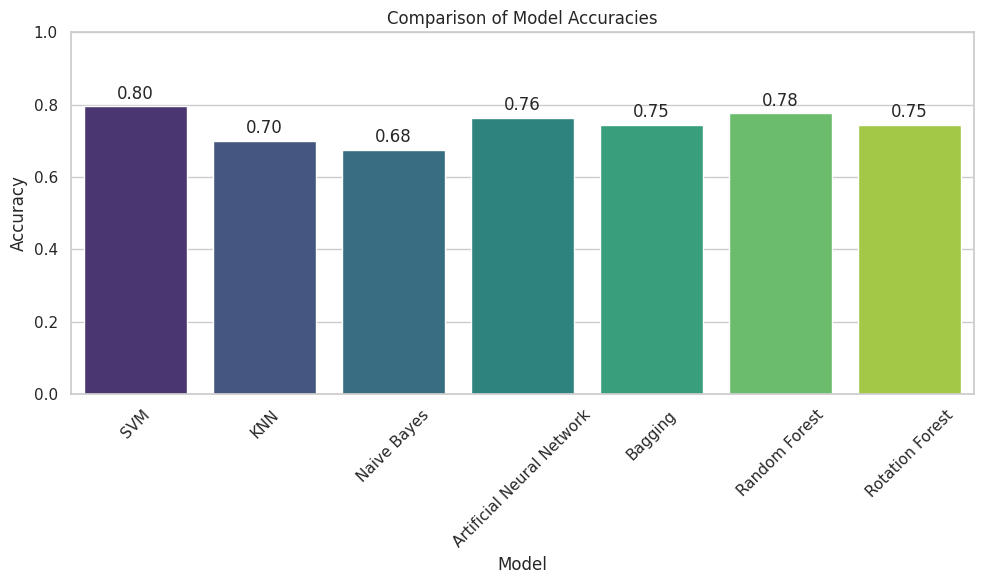

In [ ]:
accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'Accuracy'])
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')

plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### SHAP

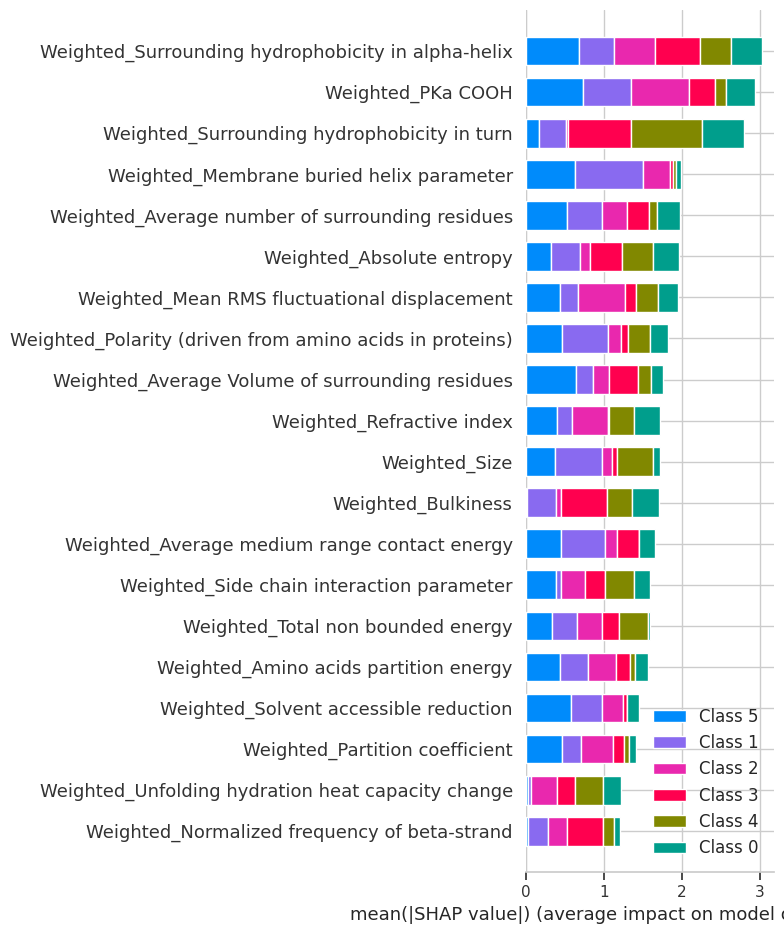

In [ ]:
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)
explainer = shap.Explainer(svm_model, X_train)

shap_values = explainer.shap_values(X_train)

shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_train.iloc[0])
shap.summary_plot(shap_values, X_train, feature_names=X_train.columns)


  0%|          | 0/100 [00:00<?, ?it/s]

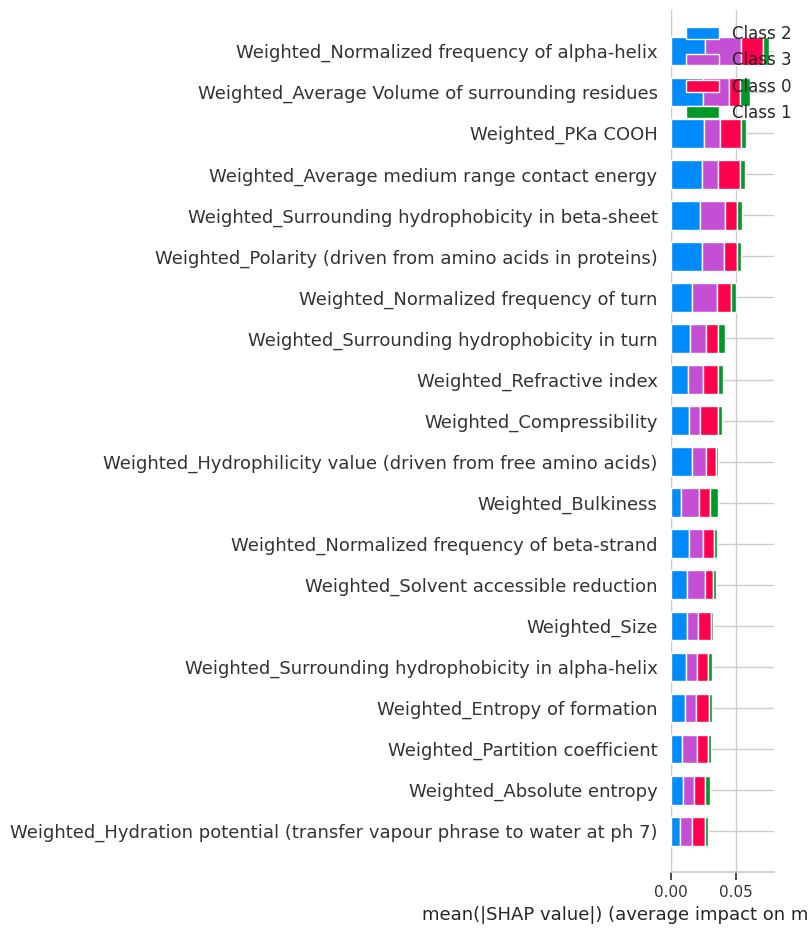

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

explainer = shap.KernelExplainer(knn_model.predict_proba, X_train)

shap_values = explainer.shap_values(X_train.sample(100))

shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_train.iloc[0])

shap.summary_plot(shap_values, X_train.sample(100), feature_names=X_train.columns)


### Results

Highest Accuracy: The SVM model achieved the highest accuracy at approximately 0.796, indicating its superior ability to generalize on this dataset.
Moderate Performers: The KNN and Naive Bayes models showed moderate performance, with accuracies of 0.701 and 0.675, respectively.
Competitive Models: The Artificial Neural Network, Bagging, Random Forest, and Rotation Forest demonstrated competitive performance, with accuracies ranging from 0.745 to 0.777.
The KNN model's cross-validation scores varied, indicating possible inconsistencies in its predictive performance. The SVM model exhibited robust precision and recall, especially in 'Fold1' and 'Fold3', demonstrating its reliable classification capability. Naive Bayes showed a notable performance in 'Fold1' but faced challenges in accurately classifying other folds. The ANN, Bagging, Random Forest, and Rotation Forest models displayed a balanced performance across most folds, with limitations observed in predicting certain classes, particularly 'Fold2'.SHAP analysis provided valuable insights into the features that significantly influenced the models' predictions. Some of the features are
Weighted Surrounding Hydrophobicity in Alpha-Helix
Weighted pKa COOH
Weighted Surrounding Hydrophobicity in Turn
Weighted Membrane Buried Helix Parameter
Weighted Average Number of Surrounding Residues


## Conclusion

The analysis revealed SVM as the most accurate model for this specific dataset, suggesting its effectiveness in handling the given classification task. However, the consistent difficulty across models in predicting 'Fold2' indicates a possible issue with this class, such as underrepresentation or inherent complexity. This finding suggests a need for further investigation into 'Fold2', possibly involving more detailed feature analysis or class-specific data augmentation.
The moderate performance of ANN and Random Forest, along with the competent results from Bagging and Rotation Forest, indicates that ensemble methods and neural networks hold promise for this task and could benefit from further tuning and optimization.
In summary, while SVM emerged as the best model in terms of accuracy, the overarching challenge for all models was the prediction of 'Fold2', highlighting an area for future improvement and research.
